In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [23]:
# Check for Null Values
is_null = df.isnull().sum()[df.isnull().sum() > 0]
len(is_null)

0

In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [6]:
df.DEATH_EVENT.value_counts().to_frame()

DEATH_EVENT
0          203
1           96

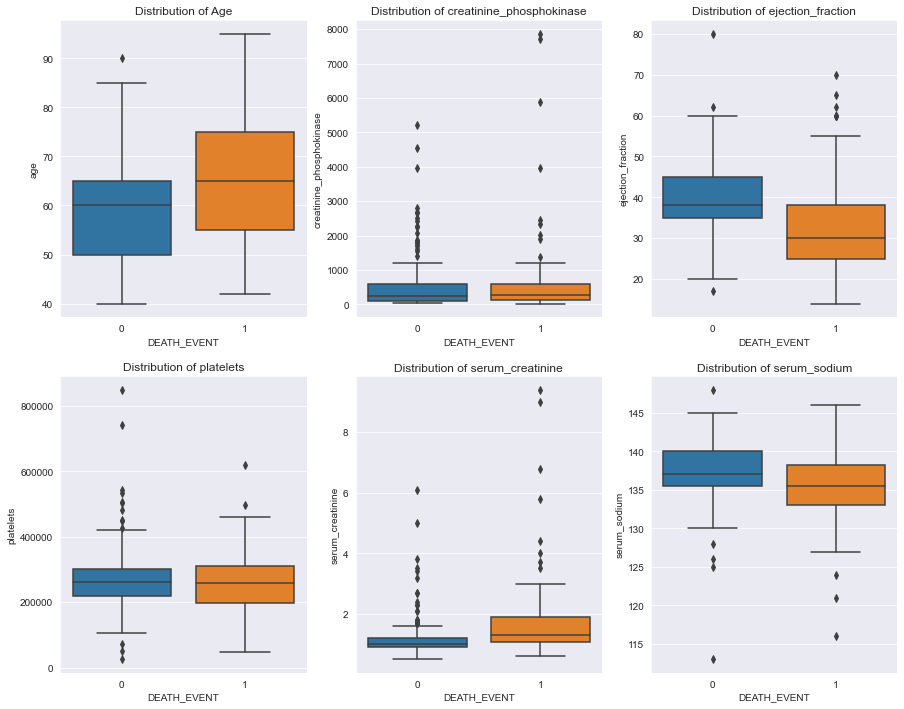

In [7]:
plt.figure(figsize=(15, 12))

plt.subplot(2,3,1)
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Distribution of Age')

plt.subplot(2,3,2)
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df)
plt.title('Distribution of creatinine_phosphokinase')

plt.subplot(2,3,3)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Distribution of ejection_fraction')

plt.subplot(2,3,4)
sns.boxplot(x='DEATH_EVENT', y='platelets', data=df)
plt.title('Distribution of platelets')

plt.subplot(2,3,5)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Distribution of serum_creatinine')

plt.subplot(2,3,6)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Distribution of serum_sodium');

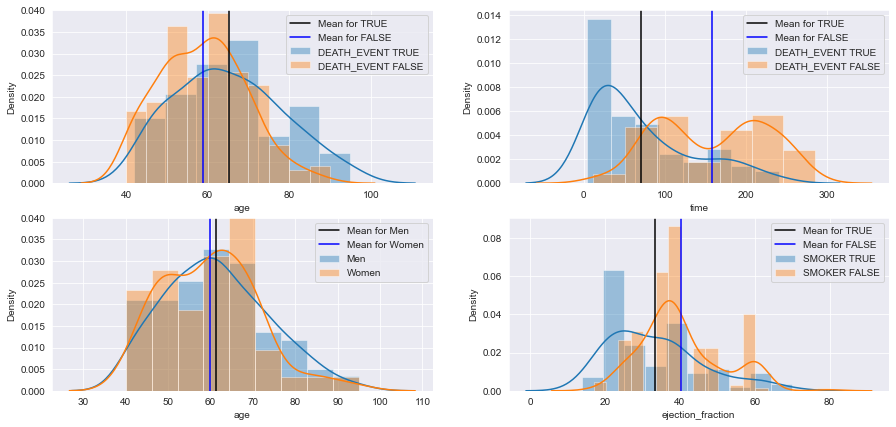

In [8]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
sns.distplot(df[df['DEATH_EVENT'] == 1]['age'], label='DEATH_EVENT TRUE')
sns.distplot(df[df['DEATH_EVENT'] == 0]['age'], label='DEATH_EVENT FALSE')
plt.axvline(df[df['DEATH_EVENT'] == 1]['age'].mean(), 1, 0, color='black', label='Mean for TRUE')
plt.axvline(df[df['DEATH_EVENT'] == 0]['age'].mean(), 1, 0, color='blue', label='Mean for FALSE')
plt.ylim(0,0.04)
plt.legend()

plt.subplot(2,2,2)
sns.distplot(df[df['DEATH_EVENT'] == 1]['time'], label='DEATH_EVENT TRUE')
sns.distplot(df[df['DEATH_EVENT'] == 0]['time'], label='DEATH_EVENT FALSE')
plt.axvline(df[df['DEATH_EVENT'] == 1]['time'].mean(), 1, 0, color='black', label='Mean for TRUE')
plt.axvline(df[df['DEATH_EVENT'] == 0]['time'].mean(), 1, 0, color='blue', label='Mean for FALSE')
plt.legend()

plt.subplot(2,2,3)
sns.distplot(df[df['sex'] == 1]['age'], label='Men')
sns.distplot(df[df['sex'] == 0]['age'], label='Women')
plt.axvline(df[df['sex'] == 1]['age'].mean(), 1, 0, color='black', label='Mean for Men')
plt.axvline(df[df['sex'] == 0]['age'].mean(), 1, 0, color='blue', label='Mean for Women')
plt.ylim(0,0.04)
plt.legend()

plt.subplot(2,2,4)
sns.distplot(df[df['DEATH_EVENT'] == 1]['ejection_fraction'], label='SMOKER TRUE')
sns.distplot(df[df['DEATH_EVENT'] == 0]['ejection_fraction'], label='SMOKER FALSE')
plt.axvline(df[df['DEATH_EVENT'] == 1]['ejection_fraction'].mean(), 1, 0, color='black', label='Mean for TRUE')
plt.axvline(df[df['DEATH_EVENT'] == 0]['ejection_fraction'].mean(), 1, 0, color='blue', label='Mean for FALSE')
plt.legend();

In [9]:
from scipy import stats
def welch_test(a, b):
    t_value, p_value = stats.ttest_ind(a, b, equal_var=False)
    if p_value > 0.05:
        print('Null-Hypotheses cannot be rejected - both groups are equal')
    else:
        print('Null-Hypotheses can be rejected - significant difference between the two groups')
    return (t_value, p_value)

In [10]:
t, p = welch_test(df[df['sex'] == 0]['age'], df[df['sex'] == 1]['age'])
print(f'T-Value: {t}, P-Value: {p}')

Null-Hypotheses cannot be rejected - both groups are equal
T-Value: -1.158613562491135, P-Value: 0.24781972347867628


In [11]:
t, p = welch_test(df[df['DEATH_EVENT'] == 0]['ejection_fraction'], df[df['smoking'] == 1]['ejection_fraction'])
print(f'T-Value: {t}, P-Value: {p}')

Null-Hypotheses can be rejected - significant difference between the two groups
T-Value: 2.4453512076806443, P-Value: 0.015418341405658911


Text(0.5, 1.0, 'Correlation Heatmap')

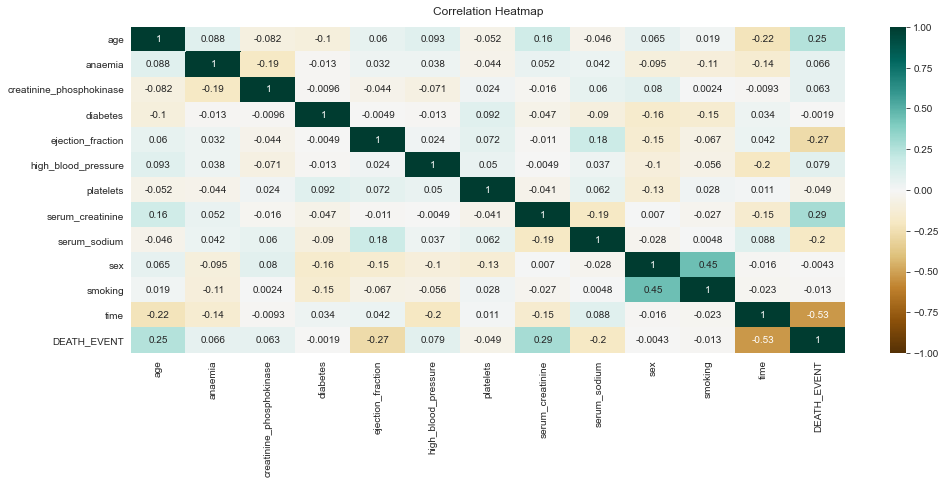

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

smoking    0   1
sex             
0        101   4
1        102  92

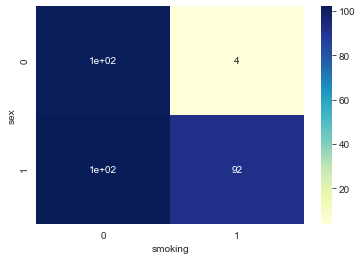

In [13]:
contigency = pd.crosstab(df['sex'], df['smoking'])
sns.heatmap(contigency, annot=True, cmap="YlGnBu");
contigency

smoking        0   1
DEATH_EVENT         
0            137  66
1             66  30

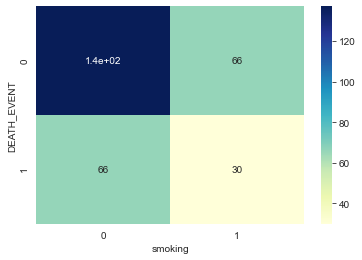

In [14]:
contigency = pd.crosstab(df['DEATH_EVENT'], df['smoking'])
sns.heatmap(contigency, annot=True, cmap="YlGnBu");
contigency

# Logistic Regression

In [15]:
from sklearn import preprocessing
X_data = df.drop(['DEATH_EVENT'], axis=1).values
y_data = df['DEATH_EVENT'].values
X_data = preprocessing.StandardScaler().fit(X_data).transform(X_data)
X_data[0:2]

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00,
        -8.47579380e-01, -7.07675018e-03, -7.35688190e-01,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (209, 12) (209,)
Test set: (90, 12) (90,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_values = np.arange(0.1, 10, 0.1)
accuracy = np.zeros(len(C_values))
classification_reports = []
confusion_matrixes = []

for i, c in enumerate(C_values):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    yhat = LR.predict(X_test)
    accuracy[i] = metrics.accuracy_score(yhat, y_test)
    classification_reports.append(metrics.classification_report(y_test, yhat))
    confusion_matrixes.append(metrics.confusion_matrix(y_test, yhat))

print('Maximum Accuracy achieved:', round(accuracy.max(), 4), 'with', C_values[accuracy.argmax()])
print(f'\nClassification Report:\n{classification_reports[accuracy.argmax()]}')
print(f'Accuracies: {accuracy[:3]}...')

Maximum Accuracy achieved: 0.8556 with 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        66
           1       0.72      0.75      0.73        24

    accuracy                           0.86        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.86      0.86      0.86        90

Accuracies: [0.84444444 0.83333333 0.83333333]...


<AxesSubplot:>

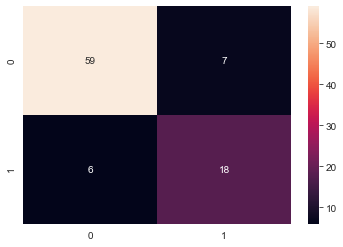

In [18]:
sns.heatmap(confusion_matrixes[accuracy.argmax()], annot=True)

Text(0, 0.5, 'Accuracy')

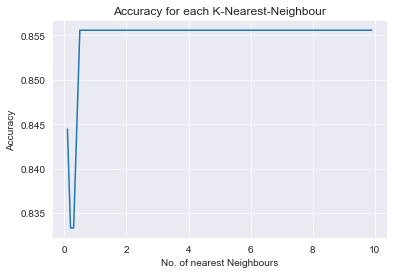

In [19]:
plt.plot(C_values, accuracy)
plt.title('Accuracy for each K-Nearest-Neighbour')
plt.xlabel('No. of nearest Neighbours')
plt.ylabel('Accuracy')

# K-Nearest-Neighbor

In [20]:
# Create K-Nearest Neighbour and calculate accuracy for different 'Ks'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 25
accuracy = np.zeros((Ks-1))
classification_reports = []
confusion_matrixes = []

for n in range(1, Ks):
    # Train Model and Predict
    clm = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clm.predict(X_test)
    accuracy[n-1] = metrics.accuracy_score(y_test, yhat)
    classification_reports.append(metrics.classification_report(y_test, yhat))
    confusion_matrixes.append(metrics.confusion_matrix(y_test, yhat))

best_K = accuracy.argmax()+1
print('Maximum Accuracy achieved:', round(accuracy.max(), 4), 'with', best_K)
print(f'\nClassification Report:\n{classification_reports[best_K-1]}')
print(f'Accuracies: {accuracy}')

Maximum Accuracy achieved: 0.8111 with 9

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        66
           1       0.89      0.33      0.48        24

    accuracy                           0.81        90
   macro avg       0.85      0.66      0.68        90
weighted avg       0.83      0.81      0.78        90

Accuracies: [0.65555556 0.75555556 0.75555556 0.74444444 0.78888889 0.76666667
 0.8        0.8        0.81111111 0.77777778 0.77777778 0.75555556
 0.77777778 0.77777778 0.78888889 0.76666667 0.78888889 0.76666667
 0.8        0.76666667 0.77777778 0.74444444 0.75555556 0.75555556]


<AxesSubplot:>

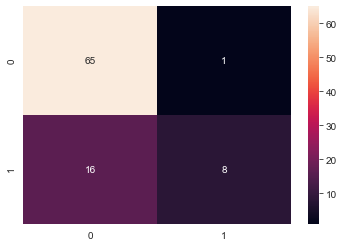

In [21]:
sns.heatmap(confusion_matrixes[best_K-1], annot=True)

Text(0, 0.5, 'Accuracy')

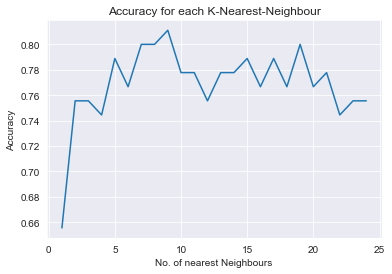

In [22]:
plt.plot(range(1, Ks), accuracy)
plt.title('Accuracy for each K-Nearest-Neighbour')
plt.xlabel('No. of nearest Neighbours')
plt.ylabel('Accuracy')